**Outline:**
1. Data Loading and Exploration
2. Data Preprocessing (handling missing values, duplicates)
3. Feature Engineering and Scaling
4. Baseline Model: Logistic Regression

## 1. Import Required Libraries

We start by importing all necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)

## 2. Loading the Dataset

Load the Iris dataset from a CSV file. The dataset contains measurements of iris flowers from three different species.

In [3]:
dataframe = pd.read_csv("iris.csv")
dataframe.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 3. Understanding the Dataset

Let's explore the dataset structure, including its shape, column names, and statistical summary. This helps us understand the data distribution and identify potential issues.

### 3.1 Dataset Shape

Check the number of samples (rows) and features (columns) in the dataset.

In [4]:
dataframe.shape

(150, 5)

### 3.2 Column Names

Display all column names to understand the available features.

In [5]:
dataframe.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 3.3 Statistical Summary

Generate descriptive statistics including count, mean, standard deviation, min, max, and quartiles for numerical columns.

In [6]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,150.000000,148.000000
mean,5.843624,3.051007,3.758667,1.210135
std,0.830851,0.433499,1.764420,0.761643
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data Quality Assessment

Check for missing values and duplicate rows that could affect model performance.

### 4.1 Missing Values Analysis

Count the number of null/missing values in each column.

In [7]:
# Finding the missing values 
dataframe.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    0
petal_width     2
species         2
dtype: int64

### 4.2 Duplicate Rows Detection

Identify duplicate rows in the dataset that might skew our analysis and model training.

In [8]:
# Find duplicate rows
dataframe[dataframe.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


## 5. Data Cleaning

Handle missing values and remove duplicates to ensure data quality.

### 5.1 Handling Missing Values in Numerical Columns

Replace missing numerical values with the column mean (mean imputation). This is a common strategy that preserves the overall distribution of the data.

In [9]:
# Handle the null values with the mean of the column
dataframe.fillna(dataframe.mean(numeric_only=True), inplace=True)

### 5.2 Verify Missing Value Handling

Confirm that numerical missing values have been handled.

In [10]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         2
dtype: int64

### 5.3 Handling Missing Target Values

Drop rows where the target variable (species) is null, as we cannot train on samples without labels.

In [11]:
# Drop the rows where the target is null
dataframe.dropna(subset=['species'], inplace=True)

### 5.4 Final Missing Value Check

Confirm all missing values have been handled.

In [12]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 5.5 Removing Duplicate Rows

Remove duplicate entries to avoid data leakage and ensure each sample is unique.

In [13]:
# Handling the duplication
dataframe.drop_duplicates(inplace=True)
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 6. Feature and Target Separation

Split the dataset into input features (X) and target variable (y) for model training.

### 6.1 Create Feature Matrix

Extract all columns except the target (species) as input features.

In [14]:
# Create input and output data
features = dataframe.drop('species', axis=1)
target = dataframe['species']

### 6.2 Display Features

View the feature matrix containing sepal and petal measurements.

In [15]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 6.3 Display Target Variable

View the target variable containing species labels.

In [16]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 145, dtype: object

## 7. Target Label Encoding

Convert categorical species names to numerical labels for machine learning models.

### 7.1 Manual Label Mapping

Create a mapping dictionary to convert species names to integers:
- setosa → 0
- versicolor → 1
- virginica → 2

In [17]:
map_target = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
target_manual = [map_target[i] for i in target]
target_manual

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### 7.2 Using Sklearn LabelEncoder

Alternatively, use sklearn's LabelEncoder for automatic encoding.

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = dataframe['species']
target = encoder.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 8. Feature Scaling

Normalize features to a common scale [0, 1] using Min-Max scaling.

### 8.1 Apply MinMax Scaling

Scale all features to the range [0, 1] to ensure equal contribution during model training.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)
features_minmax

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.42878449, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.43791946,

### 8.2 Create DataFrames for Visualization

Convert scaled features and encoded target to DataFrames for easier visualization.

In [20]:
features_df = pd.DataFrame(features_minmax, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
target_df = pd.DataFrame(target, columns=['species'])

### 8.3 Correlation Analysis with target
The absolute correlation values between each feature and the target variable can provide insights into which features are most relevant for predicting the species

In [27]:
target_series = target_df['species']
correlations = features_df.corrwith(target_series)
correlations

sepal_length    0.786367
sepal_width    -0.402850
petal_length    0.948710
petal_width     0.944835
dtype: float64

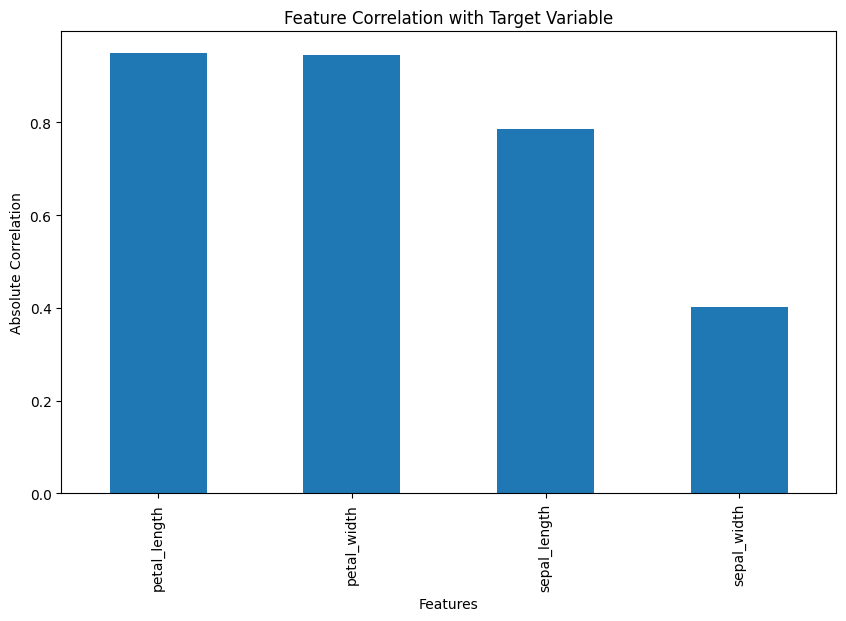

In [28]:
# Plotting the absolute correlation values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
correlations.abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Correlation with Target Variable')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.show()

## 9. Data Visualization

Visualize the feature distributions across different classes to understand class separability.

### 9.1 1D Scatter Plot of Petal Width by Class

This visualization shows how petal_width can help distinguish between the three iris species.

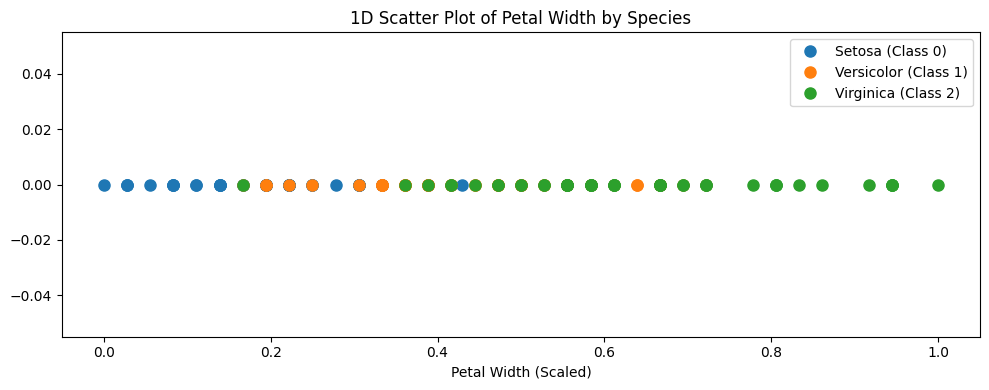

In [22]:
# Separate the data based on numeric labels
class_0 = features_df.loc[target_df["species"] == 0]
class_1 = features_df.loc[target_df["species"] == 1]
class_2 = features_df.loc[target_df["species"] == 2]

# Create a 1D scatter plot for petal_width with numeric labels
vis_key = 'sepal_length'
plt.figure(figsize=(10, 4))
plt.plot(class_0[vis_key], np.zeros_like(class_0[vis_key]), 'o', label='Setosa (Class 0)', markersize=8)
plt.plot(class_1[vis_key], np.zeros_like(class_1[vis_key]), 'o', label='Versicolor (Class 1)', markersize=8)
plt.plot(class_2[vis_key], np.zeros_like(class_2[vis_key]), 'o', label='Virginica (Class 2)', markersize=8)

plt.legend()
plt.xlabel('Petal Width (Scaled)')
plt.title('1D Scatter Plot of Petal Width by Species')
plt.tight_layout()
plt.show()

## 10. Baseline Model: Logistic Regression

Train a simple Logistic Regression classifier as a baseline for comparison with the neural network.

### 10.1 Train-Test Split and Model Training

Split data into training (90%) and test (10%) sets, then train the Logistic Regression model.

In [23]:
# Create a simple classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_minmax, target, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Logistic Regression Accuracy: {accuracy:.4f}")

### 10.2 Accuracy, Precision, Recall, F1-Score Evaluation

Evaluate the Logistic Regression model using accuracy, precision, recall, and F1-score metrics to assess its performance on the test set.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1-Score: {f1:.4f}")

Logistic Regression Accuracy: 0.9333
Logistic Regression Precision: 0.9444
Logistic Regression Recall: 0.9333
Logistic Regression F1-Score: 0.9327


## 10.3 Confusion Matrix Visualization

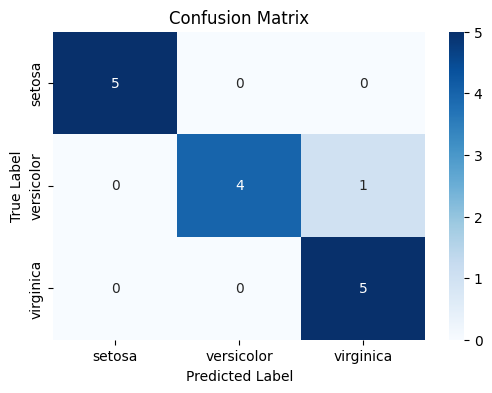

In [25]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()